# Lab X. Wrap-Up

## In this lab you will apply the concepts and techniques developed in previous sessions. You are expected to work on the assignments (A1-A4) on your own.
## You are expected to submit the code developed as well as a brief description of your findings and insights for each assigment.
## This lab represents 60% of the total marking of the module




In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
import pandas as pd

In [39]:
import seaborn as sns

In [61]:
# we need this command to remove some warning messages
pd.options.mode.chained_assignment = None  # default='warn'

In [40]:
### Let's load the gapminder dataset
gapminder = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/gapminder.tsv', sep='\t')

In [41]:
gapminder.groupby(['country','continent','year']).count()

lifeExp  pop  gdpPercap
country     continent year                         
Afghanistan Asia      1952        1    1          1
                      1957        1    1          1
                      1962        1    1          1
                      1967        1    1          1
                      1972        1    1          1
...                             ...  ...        ...
Zimbabwe    Africa    1987        1    1          1
                      1992        1    1          1
                      1997        1    1          1
                      2002        1    1          1
                      2007        1    1          1

[1704 rows x 3 columns]

In [42]:
gapminder.groupby(['continent','year']).count()

country  lifeExp  pop  gdpPercap
continent year                                  
Africa    1952       52       52   52         52
          1957       52       52   52         52
          1962       52       52   52         52
          1967       52       52   52         52
          1972       52       52   52         52
          1977       52       52   52         52
          1982       52       52   52         52
          1987       52       52   52         52
          1992       52       52   52         52
          1997       52       52   52         52
          2002       52       52   52         52
          2007       52       52   52         52
Americas  1952       25       25   25         25
          1957       25       25   25         25
          1962       25       25   25         25
          1967       25       25   25         25
          1972       25       25   25         25
          1977       25       25   25         25
          1982       25       25   25         25
          1987       25       25   25         25
          1992       25       25   25         25
          1997       25       25   25         25
          2002       25       25   25         25
          2007       25       25   25         25
Asia      1952       33       33   33         33
          1957       33       33   33         33
          1962       33       33   33         33
          1967       33       33   33         33
          1972       33       33   33         33
          1977       33       33   33         33
          1982       33       33   33         33
          1987       33       33   33         33
          1992       33       33   33         33
          1997       33       33   33         33
          2002       33       33   33         33
          2007       33       33   33         33
Europe    1952       30       30   30         30
          1957       30       30   30         30
          1962       30       30   30         30
          1967       30       30   30         30
          1972       30       30   30         30
          1977       30       30   30         30
          1982       30       30   30         30
          1987       30       30   30         30
          1992       30       30   30         30
          1997       30       30   30         30
          2002       30       30   30         30
          2007       30       30   30         30
Oceania   1952        2        2    2          2
          1957        2        2    2          2
          1962        2        2    2          2
          1967        2        2    2          2
          1972        2        2    2          2
          1977        2        2    2          2
          1982        2        2    2          2
          1987        2        2    2          2
          1992        2        2    2          2
          1997        2        2    2          2
          2002        2        2    2          2
          2007        2        2    2          2

In [43]:
gapminder.sample(10)

,country,continent,year,lifeExp,pop,gdpPercap
567,Germany,Europe,1967,70.800,76368453,14745.625610
968,Mauritania,Africa,1992,58.333,2119465,1361.369784
1215,Philippines,Asia,1967,56.393,35356600,1814.127430
1192,Paraguay,Americas,1972,65.815,2614104,2523.337977
1632,Venezuela,Americas,1952,55.088,5439568,7689.799761
626,Guinea-Bissau,Africa,1962,34.488,627820,522.034373
1185,Panama,Americas,1997,73.738,2734531,7113.692252
1531,Thailand,Asia,1987,66.084,52910342,2982.653773
592,Greece,Europe,1972,72.340,8888628,12724.829570
720,Iran,Asia,1952,44.869,17272000,3035.326002


In [44]:
asiancountries=gapminder[gapminder['continent']=='Asia']

## Assignment 1. Which economies in Asia grew the most in absolute terms ?

 ### You would need to define growth in the first place. Is it the evolution of GDP ? evolution of life expectancy ? population ? a bit of everything ? 

### Hint: refer to the following link for tips on how to plot evolution of quantitative variables:

https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial

### Have a look at the relplot command to produce visualization such as:

https://seaborn.pydata.org/_images/relational_59_0.png

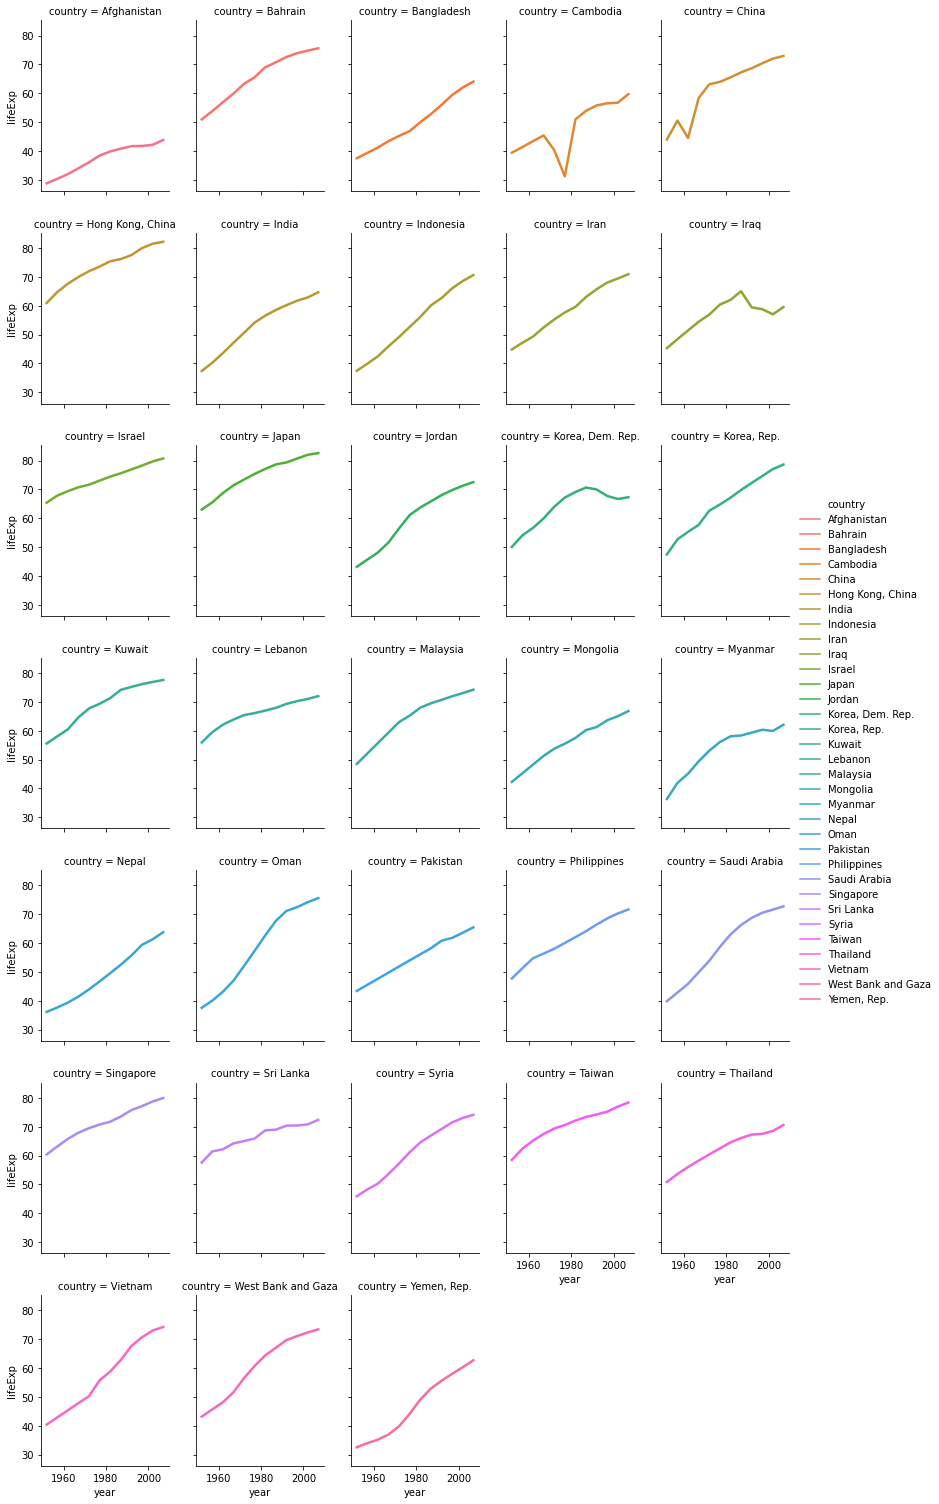

In [45]:
sns.relplot(x="year", y="lifeExp", hue="country",
            col="country", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=asiancountries);

## Assignment 2. Which economies in Asia grew the most in relative terms ?

### You would need to define growth in terms of incremental evolution of GDP and life expectancy
### This approach provides a measure of the effort of each economy to improve its living standards.

#### Hint: you would want to compute deltas (refer to time series example in the lab). develop a mini example in the time series lab with an example of a groupby and diff

#### Hint:  you would also want to compute cummulative increments (refer to time series example in the lab). develop a mini example in the time series lab with an example of a groupby and cumsum

In [57]:
asiancountries['lifeExp_diff']=asiancountries.groupby('country')['lifeExp'].diff()

In [58]:
asiancountries['lifeExp_diff_sum']=asiancountries.groupby('country')['lifeExp_diff'].cumsum()

In [59]:
asiancountries

,country,continent,year,lifeExp,pop,gdpPercap,lifeExp_diff,lifeExp_diff_sum,lifeExp_log
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,NaN,NaN,3.360410
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,1.531,1.531,3.412203
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,1.665,3.196,3.465642
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,2.023,5.219,3.526949
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,2.068,7.287,3.585960
...,...,...,...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538,3.809,20.374,3.968819
1676,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673,2.677,23.051,4.018165
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526,2.421,25.472,4.060788
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827,2.288,27.760,4.099465


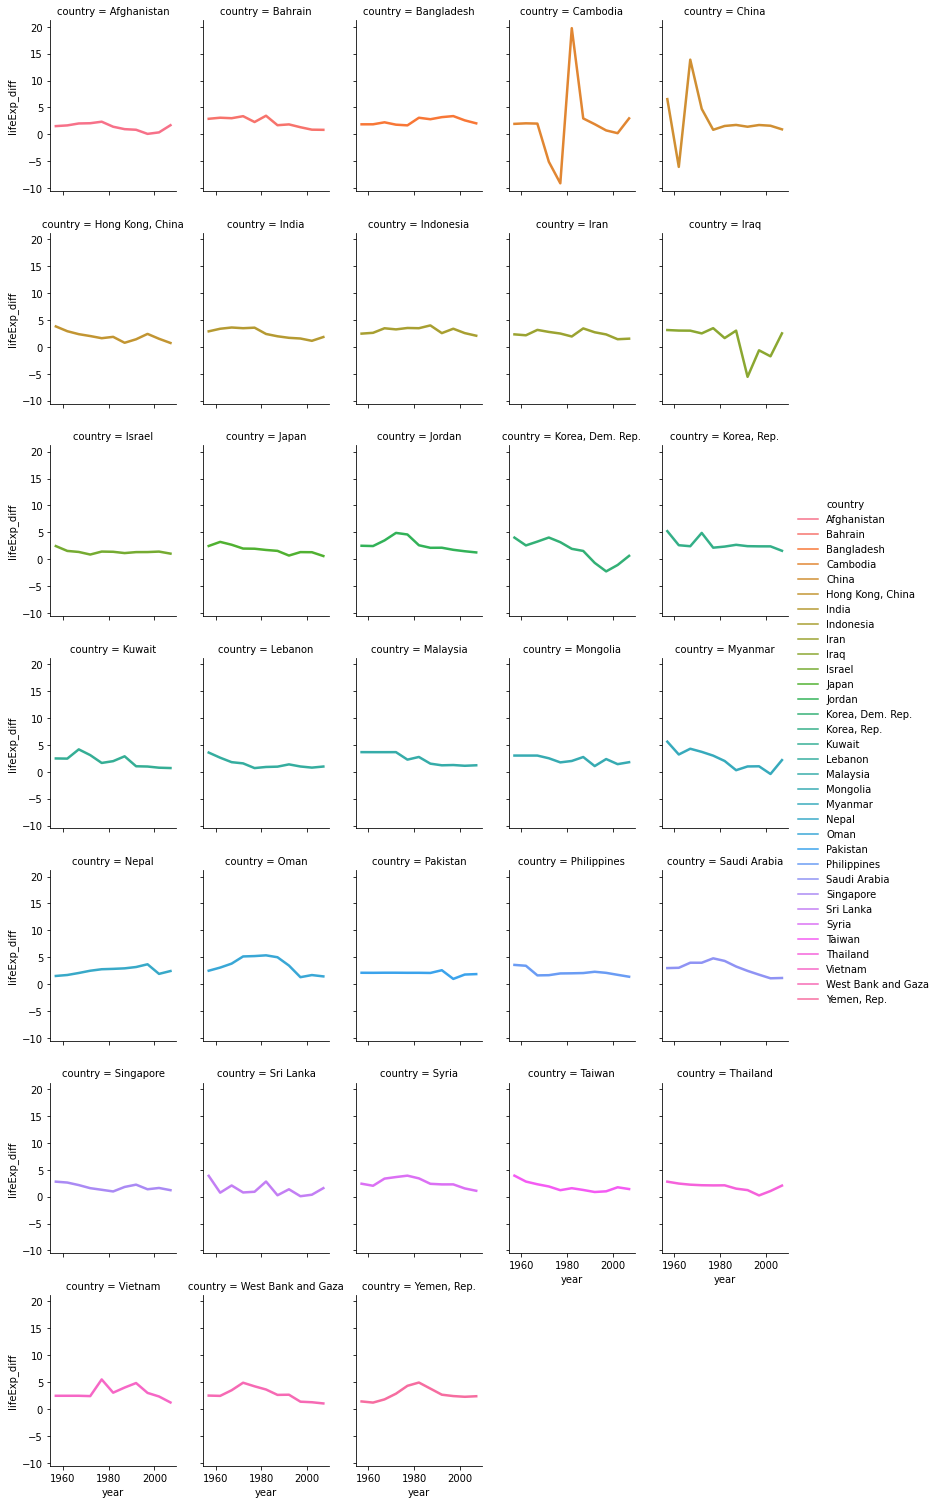

In [60]:
sns.relplot(x="year", y="lifeExp_diff", hue="country",
            col="country", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=asiancountries);

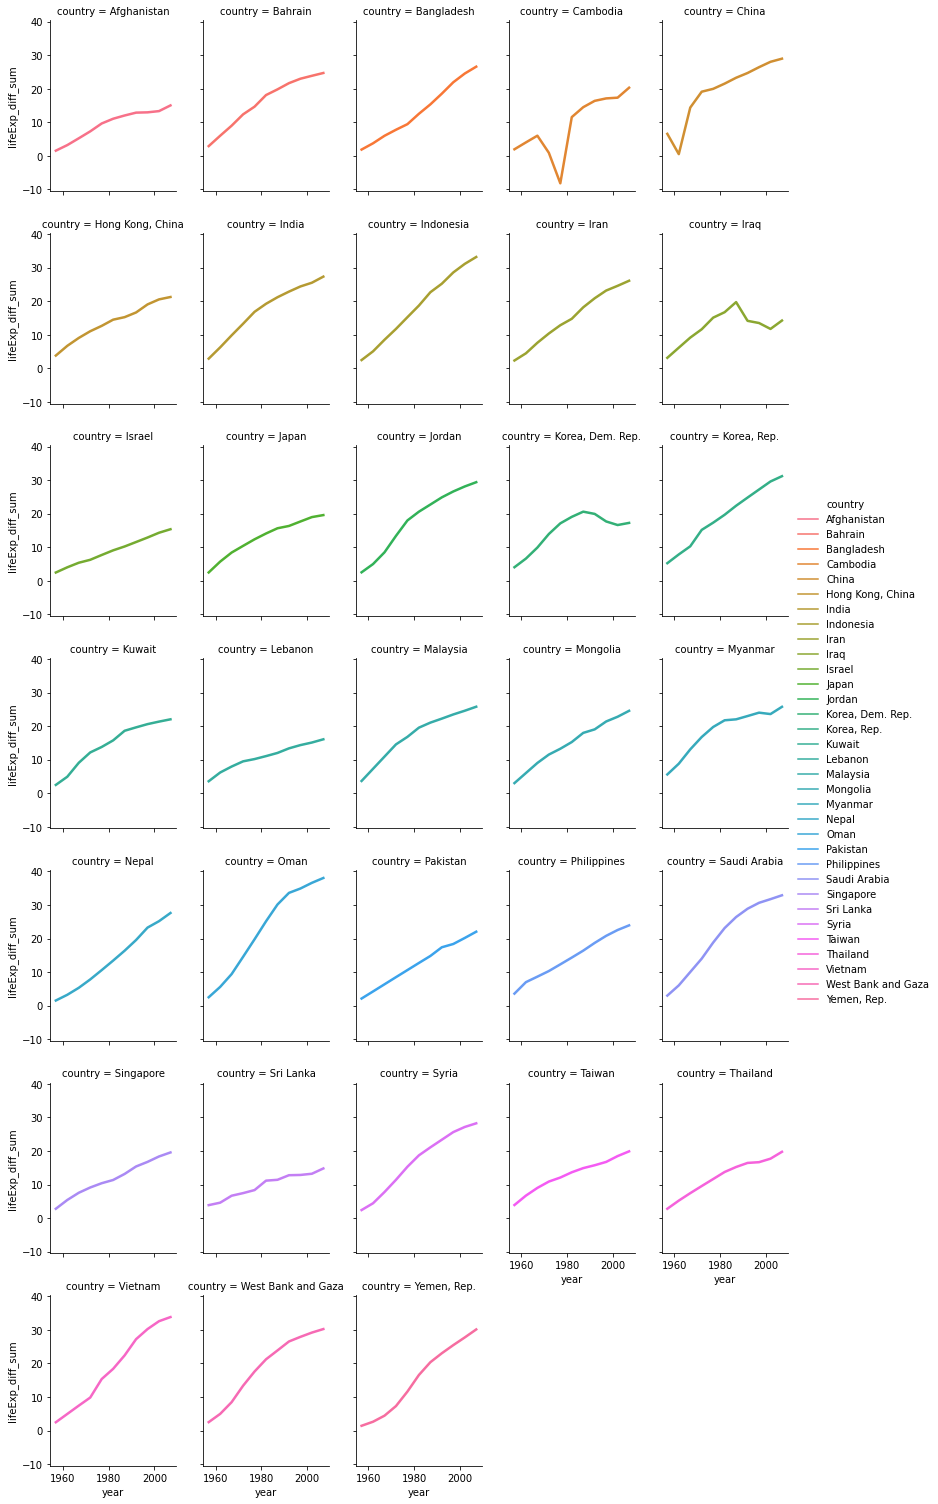

In [50]:
sns.relplot(x="year", y="lifeExp_diff_sum", hue="country",
            col="country", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=asiancountries);

## Assignment 3. Is there any relationship between GDP Per Capita and life Expectancy ?

### Hint: consider a regplot visualization
### refer to:

https://seaborn.pydata.org/tutorial/regression.html#functions-to-draw-linear-regression-models

### Hint: you can also consider a joint kernel density estimate visualization
### refer to:
https://seaborn.pydata.org/examples/joint_kde.html

In [51]:
asiancountries['lifeExp_log']=asiancountries['lifeExp'].apply(np.log)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


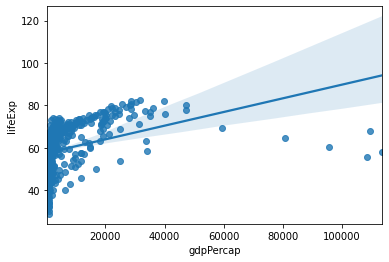

In [52]:
sns.regplot(x="gdpPercap", y="lifeExp", data=asiancountries);

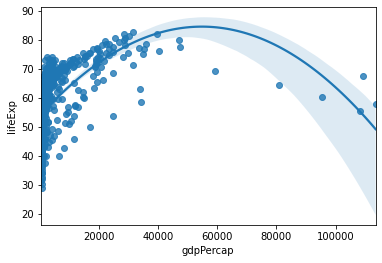

In [53]:
sns.regplot(x="gdpPercap", y="lifeExp", data=asiancountries,order=2);

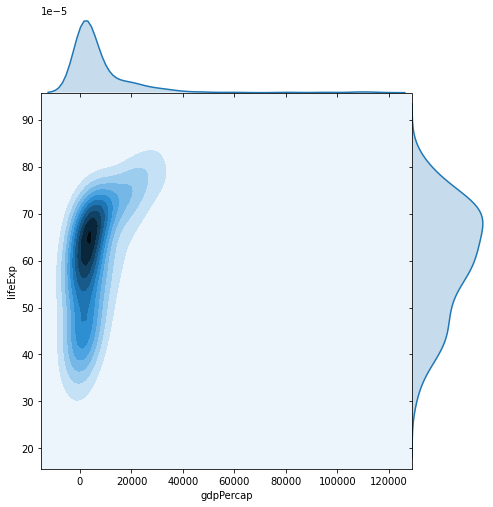

In [54]:
g = sns.jointplot(asiancountries['gdpPercap'], y=asiancountries['lifeExp'], kind="kde", height=7, space=0)

## Assignment 4. Has the relationship between GDP Per Capita and life Expectancy changed with time ?

### Tip: consider a FacetGrid visualization (year, gdpPercap, lifeExp)
### refer to:
https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

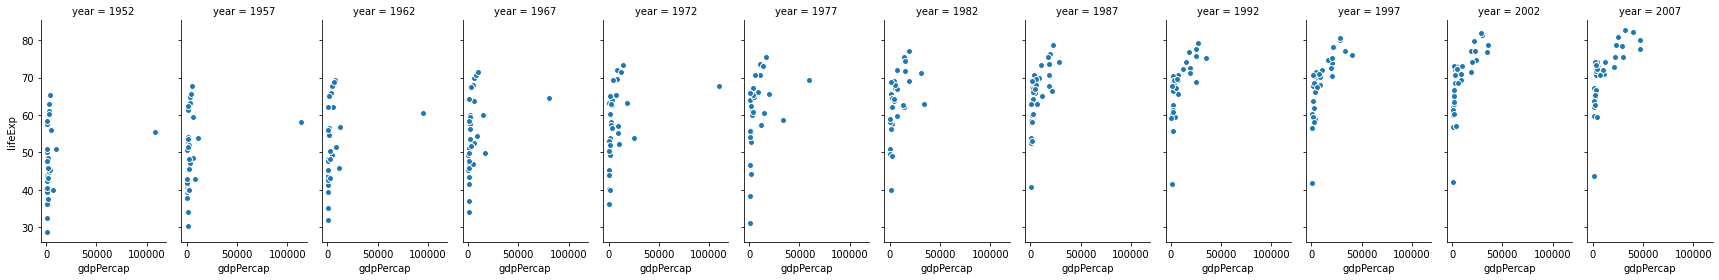

In [55]:
g = sns.FacetGrid(asiancountries, col="year", height=4, aspect=.5)
g = g.map(plt.scatter, "gdpPercap", "lifeExp", edgecolor="w")


